# ENGR-E 221 Intelligent Systems I Fall 2020

## Lab 2  Agent Based Models contiued
Thursday Lab: 9/3/2020 3:15 pm - 4:30 pm

Friday Lab: 9/4/2020 9:25 am - 10:40 am 

**Due: Friday 9/11/2020 11:59 pm EST**

## Warm-up

For this lab we will be using a jupyter notebook to run a simulation that leverages the modularity of python. However since we are using a notebook we must also use a text editior to modify our files with a .py extension. These files are the same files we built in Lab 1 and lectures 1-4 they are simply python files versus jupyter notebooks. Please make sure you have a working text editor you are comfortable with.  

Lets pick up with what we learned in Lecture 3, the files are zipped here [Python Files](https://iu.instructure.com/courses/1908787/pages/221-labs). Bring these files into your lab2 working directory so we have something similar to this:

```
|-- lab2
    |-- e221_lab2.ipynb
    |-- Environment.py
    |-- pizza.py
    |-- plotting.py
    |-- Prey.py
    |-- setup.py
    |-- simulation.py
    |-- Drone.py
```

Notice there is a simulation.py file which is the exact same bit of code you saw in lecture 3 slide x. You can now run the next line of code and discuss with your group what happens. 

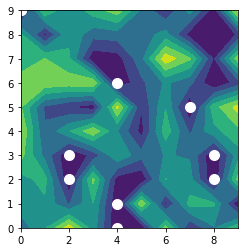

In [1]:
run simulation

Now we can look at prey list.

```python 
prey_list
```

It would be useful to be able to interact with prey\_list. Let's get some syntax for adding and removing prey from the prey\_list. Suppose something eats prey \# 3, we'd need some way to delete it from the list. Here's how:

```python

del prey_list[3]
prey_list
```

Note that iterating through prey_list is a bit harder after you remove something, because the indices don't go in order any more. (There is a gap.) Here's the goofy syntax to go thorugh your prey list after you delete something: 

```python
for i in prey_list.keys():
     # do something 
     print( prey_list[i].i ); 
```

Now lets add prey and assume one of the prey (\#2) gives birth. Let's append a copy of it to the prey_list:

```python
import copy # needed for proper copies of complex objects
max_ID = max( prey_list.keys() );    # look at the keys in prey_list, and get the maximum one 
# prey_list[ max_ID + 1] = prey_list[2]; # does not act as you would expect! 
prey_list[ max_ID + 1] = copy.copy( prey_list[2] );  
# add a new prey that copies 2nd one and append to the list with a bigger ID
prey_list 
```

In [ ]:
# explore interacting with prey_list here
prey_list

## Task 1: Creating and using the prey\_IDs data structure (5 minutes)

1) Open up the source code for the Environment class Environment.py using a text editor of your choice. In the initialization function, create an array named prey_IDs that is the same size as Food and initialized to -1. 

2) Update the resize function so that it also resizes prey_IDs. 

3) Update the startup routine in startup.py so that when prey are instantiated, their IDs are written to the new lattice structure in the environment. Set the number\_of\_prey to 50 prey. 

In [ ]:
# Student work below but final edits need to be in the correct .py files

## Task 2: Creating a Drone class (15 minutes)

1) Create a new Drone class in drone.py. Make sure it imports Environment and Prey. 

      In the constructor, set the following: 

      a) position, initilized to a random position (i,j) in environment 

      b) stencil, initially set to [ [-1,0] , [0,-1] , [1,0] , [0,1] ] 
 
      c) weights, initially set to [1,1,1,1]
      
      
Your constructor should look similar to this:
```python
class Drone:
     def __init__( self , environment ):
          [M,N] = environment.Food.shape; 
          self.i = np.random.randint(M);
          self.j = np.random.randint(N); 
          self.stencil = [[-1,0], [0,-1], [1,0], [0,1]]; 
          self.weights = [1,1,1,1]; 
          return; 
        ```

2) Add a function called hunt( self, environment, prey_list ) but just have it return for now. 

3) Import Prey into your startup.py and simulation.py files. 

4) Update simulation_setup() to create drone_list similarly to prey_list to make 5 drones. Make sure you return the new drone_list. Make sure that in simulation.py you use the updated setup function. While you're at it, let's do 1000 simulation steps.  

In [ ]:
class Drone:
    def __init__(self,environment):
        [M,N] = environment.Food.shape;
        self.i = np.random.randint(M);
        self.j = np.random.randint(N);
        self.stencil = [[-1,0], [0,-1], [1,0], [0,1]]
        self.weights = [1,1,1,1];
        return

## Task 3: Making the Drones Hunt (15 minutes) 

Update the hunt function 
in the Drone class. 
 
1) If there is a prey agent at the drone's location, output to screen "found one"! 
 
2) Make a copy of the weights, and call it temp_weights. (Be careful to copy it for real! See the warmup.) 

3) For every point $\vec{s}$ in the stencil, set a candidate point $\vec{p}$ to be $\vec{p} = \vec{x} + \vec{s}$. Use periodic boundary conditions to make sure we're not testing outside the environment lattice.  

For this (safety checked) point, check to see see if there is prey there. 
If so, set the temp_weight to 10. Otherwise, set it to 1. 
 
4) For each point $\vec{p}$ calculated as above, the probability 
of the drone moving there is given by its temp weight $w$ divided 
by the sum of the temp weights.  

Using the method from Lecture 4, choose at random a site to move to. 
Update the drone's position accordingly. 

5) In the main simulation loop, update the code  to run through the drone list and have each drone hunt. Update the startup so that there are at 1000 or more time steps.
   Give Lecture 4 notes a good look to help you on this task. 


In [ ]:
# Student work below but final edits need to be in the correct .py files

## Task 4: Making the drones destroy (15 minutes)

Add a new function to Drone called zap. It should take prey_list and environment as its arguments. Assume that if zap has been called at the drone's location, it has found prey 
there. 

1) Have it sample the environment to determine which prey it has seen. 
2) Have it destroy the prey agent by removing it from prey_list (see warmup) and setting the array of prey IDs to -1 at this location. 

3) Make the hunt function call zap whenever it finds somehting. 


```python
     def zap( self, environment , prey_list ):
          index = environment.prey_IDs[self.i,self.j]; 
          print( "nom nom nom" ); 
          del prey_list[ index ]; 
          environment.prey_IDs[self.i,self.j] = -1; 
          return; 
```

And here's where you modify the hunt function: 

```python
     def hunt( self, environment , prey_list):
          # anybody here? 
          if environment.prey_IDs[self.i][self.j] > -1:
               print( "Found one!" ); 
               self.zap( environment, prey_list ) 
          # continues unchanged from here ... 
```

In [ ]:
# Student work below but final edits need to be in the correct .py files 

## Task 5: Improve the drones (10 minutes)

Change the drone stencil to be any $(i,j)$ where $abs(i) + abs(j) = 3$. (It's a big diamond.) Re-run

In [ ]:
# Student work below but final edits need to be in the correct .py files